In [1]:
from fastai.vision.all import *
from fastai.medical.imaging import *

from fmi.explore import *
from fmi.preprocessing import *
from fmi.pipeline import *

In [2]:
def random_(items, value=10):
    randomList = []
    for i in range(0,value):
        randomList.append(random.randint(0,10000))
    return items[randomList]

In [3]:
source = 'D:/Datasets/osic-pulmonary-fibrosis-progression/'
os_items = get_dicom_files(source, folders='train')
df_unique = pd.read_csv(f'{source}/uniq.csv')
test1 = 'D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00009637202177434476278'
test_files = get_dicom_files(test1)

pct_source = 'D:/Datasets/osic-pulmonary-fibrosis-progression/pct_10'
pct_items = get_dicom_files(source, folders='pct_10')

pct_1 = 'D:/Datasets/osic-pulmonary-fibrosis-progression/pct_window'
pct_1_items = get_dicom_files(source, folders='pct_window')

os100 = random_(os_items)
os100

(#10) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00078637202199415319443/405.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00035637202182204917484/485.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00027637202179689871102/222.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00052637202186188008618/30.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00035637202182204917484/217.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00104637202208063407045/459.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00015637202177877247924/155.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00035637202182204917484/415.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00109637202210454292264/108.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00108637202209619669361/280.dcm')]

[5, 0, 3, 4, 1, 7, 9, 6, 8, 2]
Train: [3, 4, 1, 7, 9, 6, 8, 2], ['ID00015637202177877247924', 'ID00020637202178344345685', 'ID00030637202181211009029', 'ID00073637202198167792918', 'ID00019637202178323708467', 'ID00026637202179561894768', 'ID00109637202210454292264', 'ID00076637202199015035026']
Val: [5, 0], ['ID00104637202208063407045', 'ID00067637202189903532242']
Duplicate: set()
duplicate does NOT exist


((#8) [3,4,1,7,9,6,8,2], (#2) [5,0])

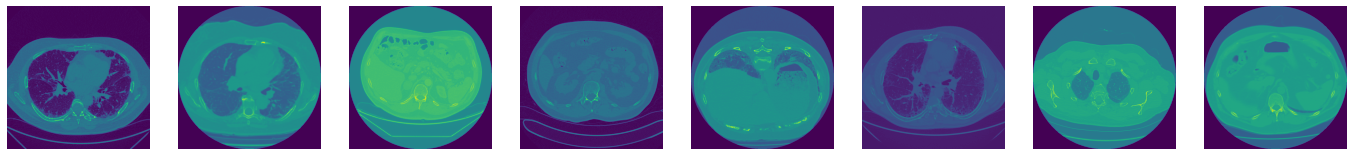

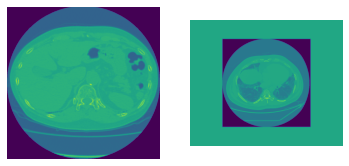

In [4]:
set_seed(7)
check_duplicate(random_(os_items), seed=7)

[5, 4, 6, 9, 0, 7, 2, 1, 8, 3]
Train: [6, 9, 0, 7, 2, 1, 8, 3], ['ID00060637202187965290703', 'ID00042637202184406822975', 'ID00042637202184406822975', 'ID00082637202201836229724', 'ID00035637202182204917484', 'ID00067637202189903532242', 'ID00108637202209619669361', 'ID00042637202184406822975']
Val: [5, 4], ['ID00027637202179689871102', 'ID00035637202182204917484']
Duplicate: {'ID00035637202182204917484'}
duplicate exists
New List: ['ID00060637202187965290703', 'ID00042637202184406822975', 'ID00042637202184406822975', 'ID00082637202201836229724', 'ID00067637202189903532242', 'ID00108637202209619669361', 'ID00042637202184406822975']


(['ID00060637202187965290703',
  'ID00042637202184406822975',
  'ID00042637202184406822975',
  'ID00082637202201836229724',
  'ID00067637202189903532242',
  'ID00108637202209619669361',
  'ID00042637202184406822975'],
 (#2) [5,4])

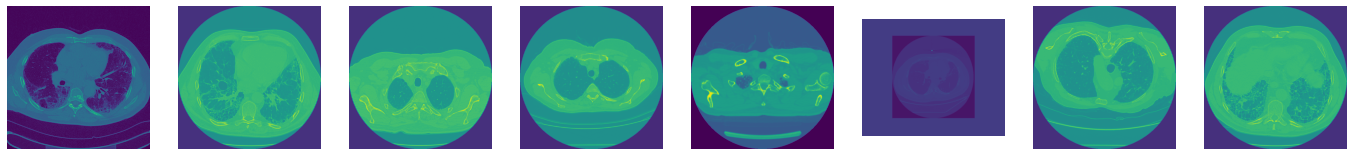

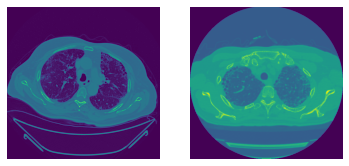

In [5]:
set_seed(77)
check_duplicate(random_(os_items), seed=77)

In [6]:
set_seed(78)
get_x1 = lambda x:f'{source2}/pct_window/{x.Patient}/{str(x.file)[2:-2]}'
get_y1 = ColReader('SmokingStatus')

blocks = (ImageBlock(cls=PEWindow))
db = DataBlock(blocks=blocks,
                   get_x=get_dicom_files,
                   splitter=dicom_splitter(pct_1_items, seed=78),
                   item_tfms=Resize(512),
                   #get_y=get_y1,
                   batch_tfms=[IntToFloatTensor(div=255)])

RuntimeError: The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. GDCM), pylibjpeg (req. )